<a href="https://colab.research.google.com/github/ngoan22mse23088/ImageVideoProcessing/blob/master/IVP501_Assignment_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FPT School of Business and Technology (FSB) - FPT University
FPT School of Business (FSB) - FPT University
Class : Master of Software Engineering (MSE12)
Subject : Image Video Processing (IVP501)
Instructor : Dr. Nguyen Ngoc Truong Minh
Student ID : 22MSE23088
Full Name : Le Chi Ngoan


# Final Exam

1. (15 điểm) – Ảnh màu (Color Image) và Cân bằng ảnh màu (Color Image Equalization)
Cho ảnh màu JPG tên Ex1.jpg </br>
(a) Hiển thị ảnh gốc và biểu đồ tần số (histogram) của ảnh gốc. </br>
(b) Áp dụng cân bằng biểu đồ tần số (histogram equalization) cho ảnh gốc. Hiển thị ảnh sau khi được
cân bằng và biểu đồ tần số của nó. </br>
(c) Hiển thị ba thành phần R, G, B của ảnh gốc, áp dụng cân bằng biểu đồ tần số cho từng thành phần.

*   List item
*   List item


Sau đó, ghép ba thành phần lại thành một ảnh màu mới. So sánh ảnh này với ảnh ở câu b.

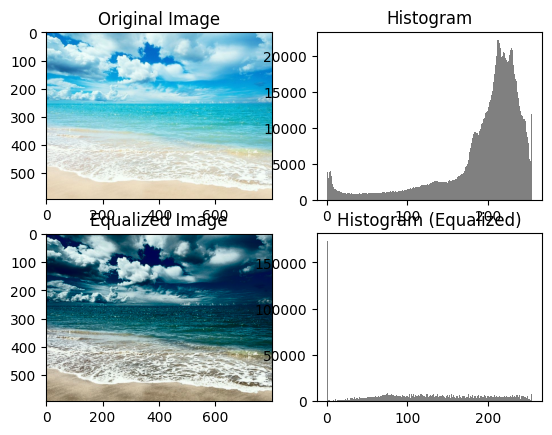

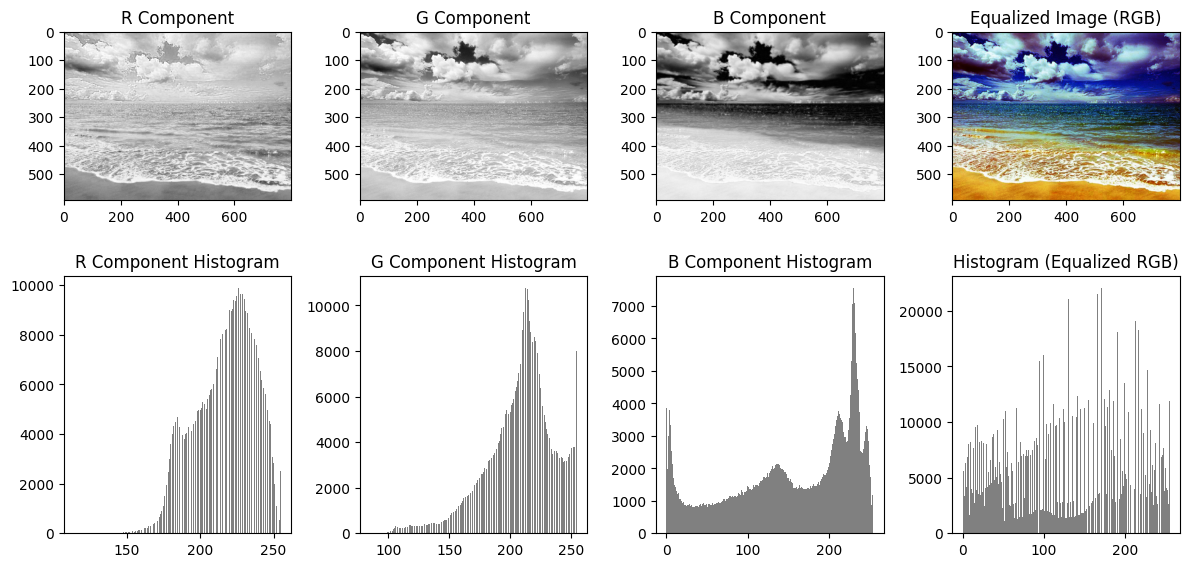

In [1]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from Git repository
url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/Ex1.jpg'
resp = urllib.request.urlopen(url)
arr = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)

# Display the original image and its histogram
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.hist(img.ravel(), bins=256, color='gray')
plt.title('Histogram')

# Apply histogram equalization to the original image
img_equalized = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_equalized[:, :, 0] = cv2.equalizeHist(img_equalized[:, :, 0])
img_equalized = cv2.cvtColor(img_equalized, cv2.COLOR_LAB2BGR)

# Display the equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_equalized, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
plt.hist(img_equalized.ravel(), bins=256, color='gray')
plt.title('Histogram (Equalized)')

# Display the R, G, B components of the original image and their equalized versions
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
components = ['R', 'G', 'B']
for i in range(3):
    ax = axes[0, i]
    ax.imshow(img[:, :, i], cmap='gray')
    ax.set_title(f'{components[i]} Component')

    ax = axes[1, i]
    ax.hist(img[:, :, i].ravel(), bins=256, color='gray')
    ax.set_title(f'{components[i]} Component Histogram')

# Perform histogram equalization on R, G, B components separately
img_equalized_rgb = img.copy()
for i in range(3):
    img_equalized_rgb[:, :, i] = cv2.equalizeHist(img[:, :, i])

# Display the equalized RGB image and its histogram
ax = axes[0, 3]
ax.imshow(cv2.cvtColor(img_equalized_rgb, cv2.COLOR_BGR2RGB))
ax.set_title('Equalized Image (RGB)')

ax = axes[1, 3]
ax.hist(img_equalized_rgb.ravel(), bins=256, color='gray')
ax.set_title('Histogram (Equalized RGB)')

# Adjust spacing and display the plots
plt.tight_layout()
plt.show()

2. (15 điểm) – Phát hiện Đường biên (Edge Detection)
Cho ảnh màu JPG tên Ex2.jpg </br>
(a) Loại bỏ nhiễu khỏi ảnh gốc bằng một bộ lọc thông thấp Low-Pass Filter. </br>
(b) Áp dụng các toán tử Prewitt, Sobel và Roberts để phát hiện các cạnh. Đối với mỗi trường hợp, hãy sử dụng ba giá trị ngưỡng khác nhau để minh họa các biến thể. </br>
(c) Làm sắc nét bức ảnh (sharpening) bằng hai bộ lọc 3x3 và 5x5 được thiết kế tùy chọn.

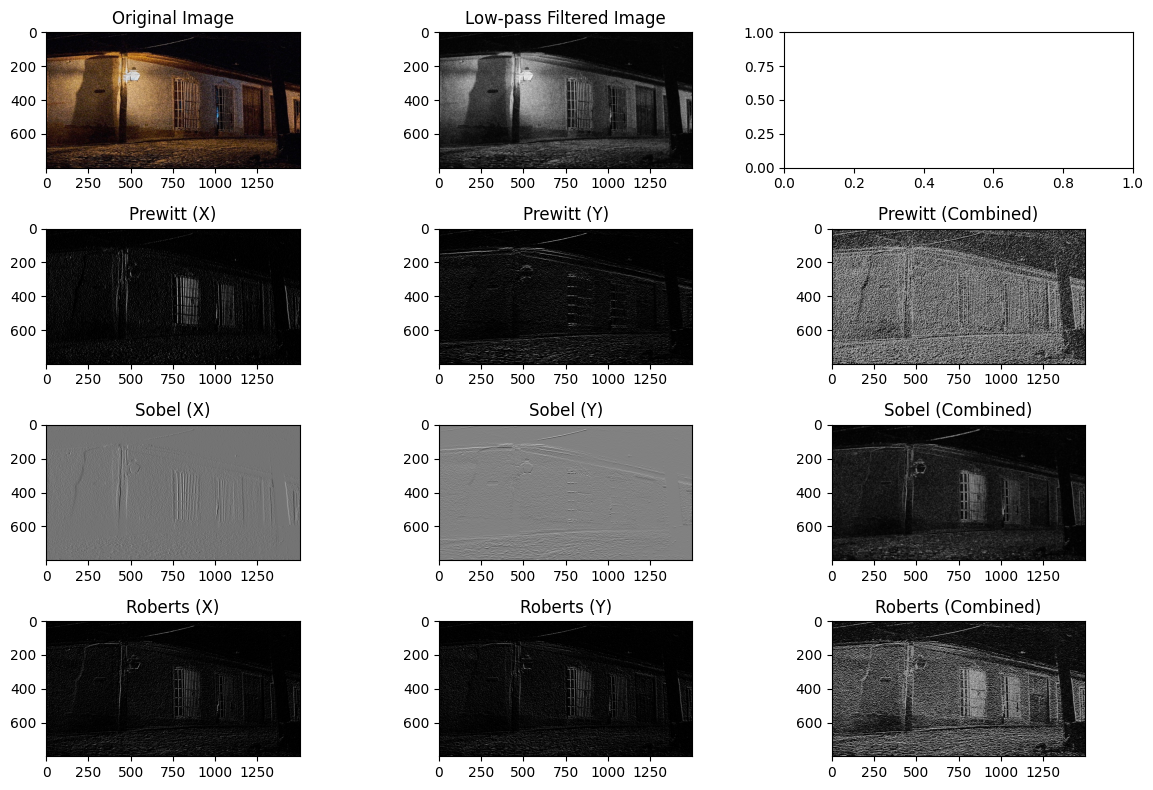

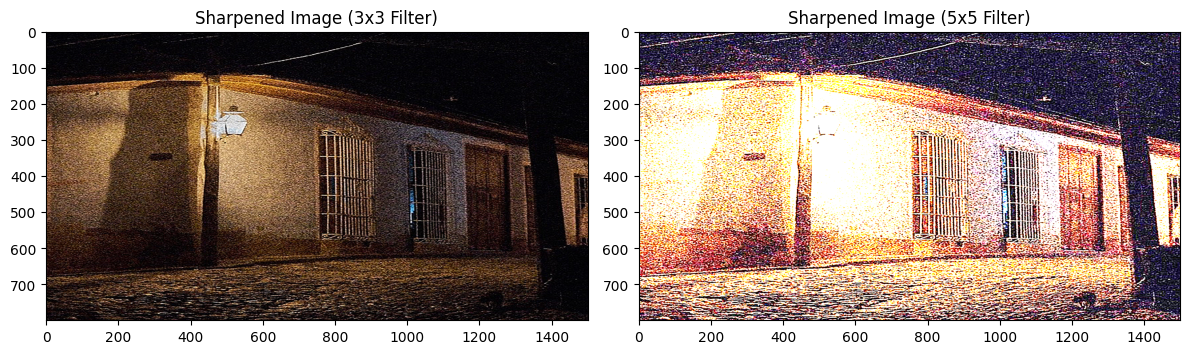

In [11]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from Git repository
url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/Ex2.jpg'
resp = urllib.request.urlopen(url)
arr = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a low-pass filter to remove noise
lowpass_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Apply edge detection using Prewitt, Sobel, and Roberts operators
prewitt_x = cv2.filter2D(lowpass_img, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(lowpass_img, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt = np.sqrt(np.square(prewitt_x) + np.square(prewitt_y))

sobel_x = cv2.Sobel(lowpass_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(lowpass_img, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

roberts_x = cv2.filter2D(lowpass_img, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(lowpass_img, -1, np.array([[0, 1], [-1, 0]]))
roberts = np.sqrt(np.square(roberts_x) + np.square(roberts_y))

# Define custom sharpening filters
sharpen_3x3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
sharpen_5x5 = np.array([[-1, -1, -1, -1, -1],
                        [-1,  2,  2,  2, -1],
                        [-1,  2,  8,  2, -1],
                        [-1,  2,  2,  2, -1],
                        [-1, -1, -1, -1, -1]], dtype=np.float32)

# Apply sharpening filters
sharpened_3x3 = cv2.filter2D(img, -1, sharpen_3x3)
sharpened_5x5 = cv2.filter2D(img, -1, sharpen_5x5)

# Plot and display the images
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))

# Original image
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')

# Low-pass filtered image
axes[0, 1].imshow(lowpass_img, cmap='gray')
axes[0, 1].set_title('Low-pass Filtered Image')

# Edge detection - Prewitt
axes[1, 0].imshow(prewitt_x, cmap='gray')
axes[1, 0].set_title('Prewitt (X)')

axes[1, 1].imshow(prewitt_y, cmap='gray')
axes[1, 1].set_title('Prewitt (Y)')

axes[1, 2].imshow(prewitt, cmap='gray')
axes[1, 2].set_title('Prewitt (Combined)')

# Edge detection - Sobel
axes[2, 0].imshow(sobel_x, cmap='gray')
axes[2, 0].set_title('Sobel (X)')

axes[2, 1].imshow(sobel_y, cmap='gray')
axes[2, 1].set_title('Sobel (Y)')

axes[2, 2].imshow(sobel, cmap='gray')
axes[2, 2].set_title('Sobel (Combined)')

# Edge detection - Roberts
axes[3, 0].imshow(roberts_x, cmap='gray')
axes[3, 0].set_title('Roberts (X)')

axes[3, 1].imshow(roberts_y, cmap='gray')
axes[3, 1].set_title('Roberts (Y)')

axes[3, 2].imshow(roberts, cmap='gray')
axes[3, 2].set_title('Roberts (Combined)')

# Adjust spacing and display the plots
plt.tight_layout()
plt.show()

# Plot and display the sharpened images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Sharpening filter - 3x3
axes[0].imshow(cv2.cvtColor(sharpened_3x3, cv2.COLOR_BGR2RGB))
axes[0].set_title('Sharpened Image (3x3 Filter)')

# Sharpening filter - 5x5
axes[1].imshow(cv2.cvtColor(sharpened_5x5, cv2.COLOR_BGR2RGB))
axes[1].set_title('Sharpened Image (5x5 Filter)')

# Adjust spacing and display the plots
plt.tight_layout()
plt.show()

3. (10 điểm) - Ảnh màu (Color Image) và Ảnh nhị phân (Binary Image)
Cho ảnh màu JPG tên Ex3.jpg </br>
Biến đổi ảnh trên thành ảnh nhị phân bằng 3 phương pháp: ngưỡng thủ công (manual thresholding),ngưỡng toàn cục (global thresholding) và ngưỡng cục bộ (local thresholding). </br>
So sánh 3 phương pháp và hiển thị biểu đồ tần số.

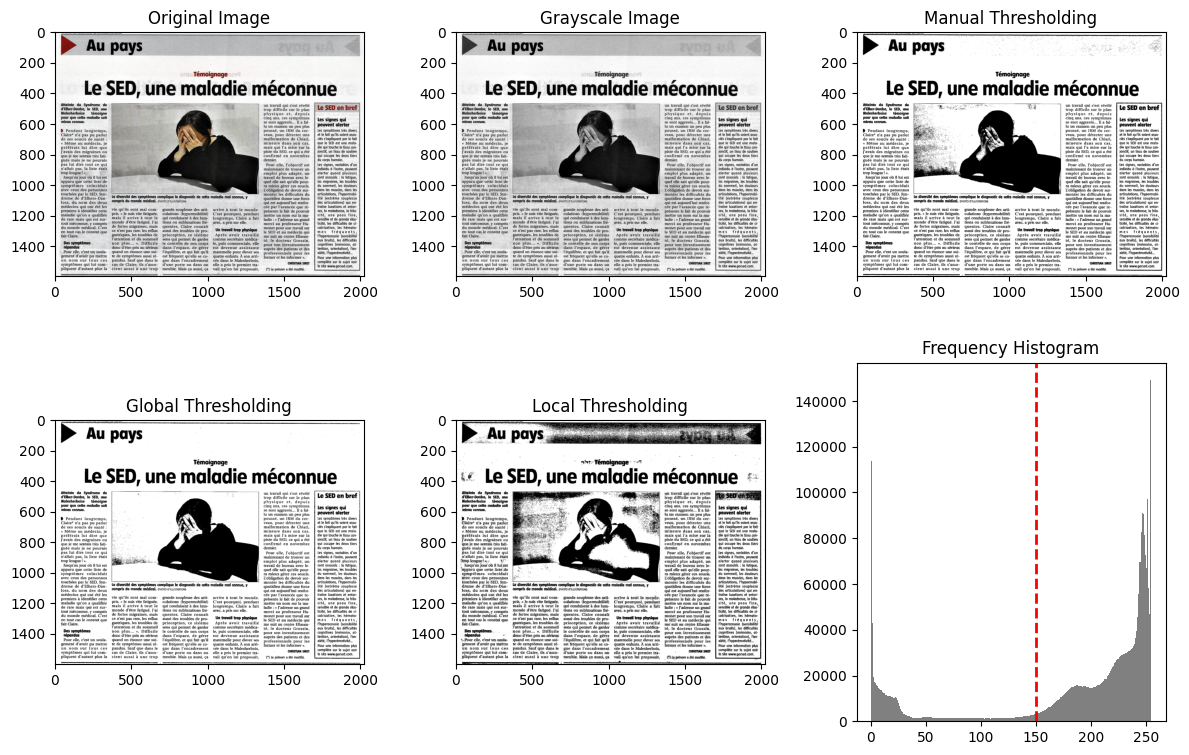

In [13]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image from Git repository
url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/Ex3.jpg'
resp = urllib.request.urlopen(url)
arr = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Manual thresholding
manual_thresh = 150
manual_binary = cv2.threshold(gray_img, manual_thresh, 255, cv2.THRESH_BINARY)[1]

# Global thresholding
_, global_binary = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Local thresholding
block_size = 151
constant = 10
local_binary = cv2.adaptiveThreshold(
    gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant
)

# Plot and display the images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Original image
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')

# Grayscale image
axes[0, 1].imshow(gray_img, cmap='gray')
axes[0, 1].set_title('Grayscale Image')

# Manual thresholding
axes[0, 2].imshow(manual_binary, cmap='gray')
axes[0, 2].set_title('Manual Thresholding')

# Global thresholding
axes[1, 0].imshow(global_binary, cmap='gray')
axes[1, 0].set_title('Global Thresholding')

# Local thresholding
axes[1, 1].imshow(local_binary, cmap='gray')
axes[1, 1].set_title('Local Thresholding')

# Frequency histogram
axes[1, 2].hist(gray_img.ravel(), bins=256, color='gray')
axes[1, 2].axvline(manual_thresh, color='r', linestyle='--', linewidth=2)
axes[1, 2].set_title('Frequency Histogram')

# Adjust spacing and display the plots
plt.tight_layout()
plt.show()

4. (10 điểm) – Phát hiện Vật thể (Object Detection) và Đánh dấu (Region Labelling)
Cho ảnh nhị phân JPG tên Ex4.jpg </br>
Đổi màu các vật thể trong ảnh như sau: </br>
hình tròn nhỏ (màu nâu), hình tròn lớn (màu xanh lá cây), hình tam giác ngược xuống (màu cam), hình tam giác ngược lên (màu vàng), hình chữ nhật (màu tím), hình vuông (màu đỏ). </br>
Hiển thị ảnh sau khi chỉnh.

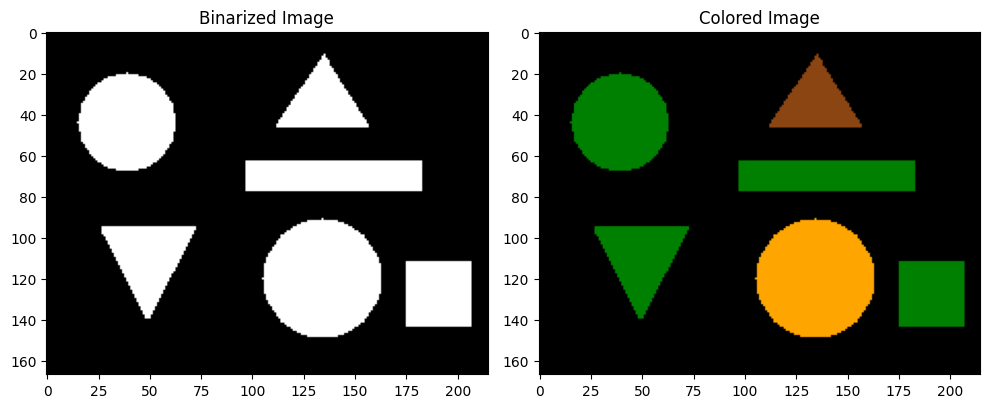

In [34]:
import numpy as np
import cv2
import urllib.request
import matplotlib.pyplot as plt

# Load the binary image from Git repository
url = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/Ex4.jpg'
resp = urllib.request.urlopen(url)
arr = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE)

# Binarize image
_, bw_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Apply connected component labeling
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(bw_img)

# Define colors for each shape based on area
colors = [(139, 69, 19), (0, 128, 0), (255, 165, 0), (255, 255, 0), (128, 0, 128), (255, 0, 0)]

# Convert the labeled image to color image with assigned colors
colored_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    if area > 0:
        shape = (area // 1000) + 1
        color = colors[shape - 1]
        colored_img[labels == i] = color

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(bw_img, cmap='gray')
plt.title('Binarized Image')

plt.subplot(1, 2, 2)
plt.imshow(colored_img)
plt.title('Colored Image')

plt.tight_layout()
plt.show()

5. (10 điểm) – Xử lý ảnh màu (Color Image Processing) </br>
(a) Biến đổi ảnh thang xám Ex5a.jpg sang ảnh màu giả (pseudo-color), sử dụng 32 thang. </br>
(b) Biến đổi ảnh màu Ex5b.jpg sang các định dạng ảnh HSV, CMY, YCBCR và NTSC. Mỗi loại hiển thị các thành phần của chúng.

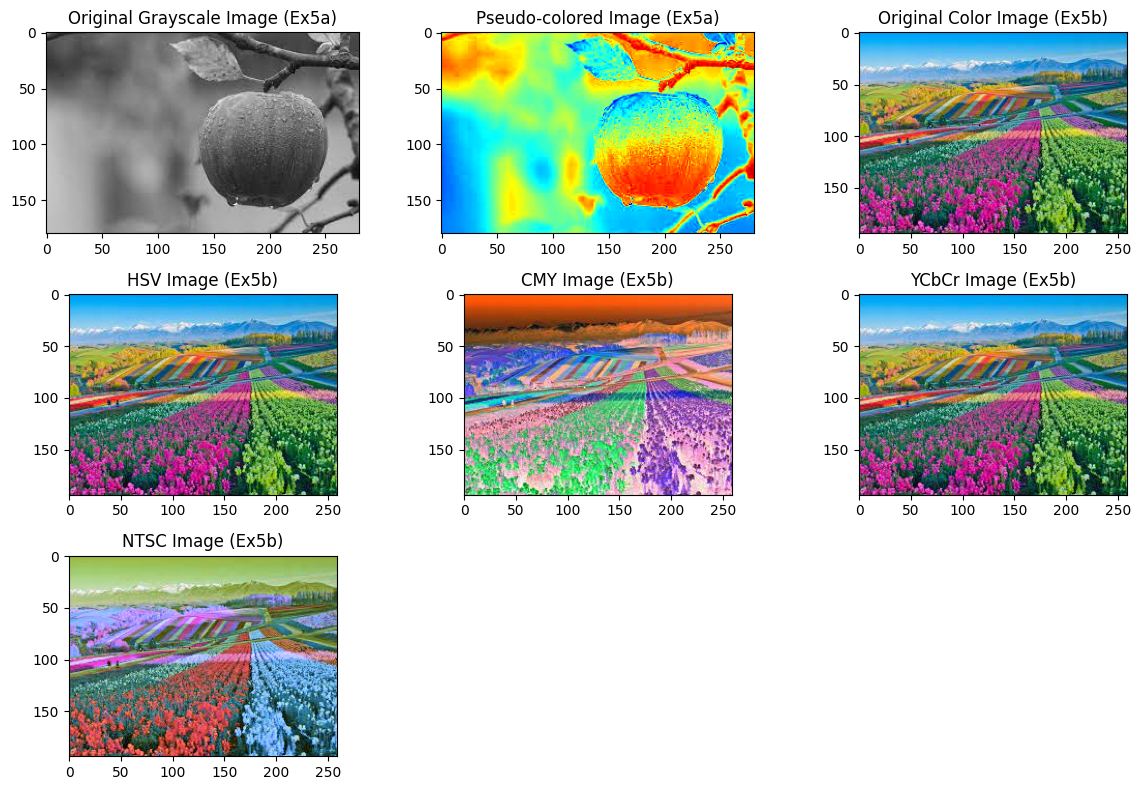

In [24]:
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# Load the original grayscale image from Git repository (Ex5a.jpg)
url_ex5a = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/Ex5a.jpg'
resp_ex5a = urllib.request.urlopen(url_ex5a)
arr_ex5a = np.asarray(bytearray(resp_ex5a.read()), dtype=np.uint8)
original_img_ex5a = cv2.imdecode(arr_ex5a, cv2.IMREAD_GRAYSCALE)

# Load the original color image from Git repository (Ex5b.jpg)
url_ex5b = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/Ex5b.jpg'
resp_ex5b = urllib.request.urlopen(url_ex5b)
arr_ex5b = np.asarray(bytearray(resp_ex5b.read()), dtype=np.uint8)
original_img_ex5b = cv2.imdecode(arr_ex5b, cv2.IMREAD_COLOR)

# Apply pseudo-coloring to the grayscale image (Ex5a.jpg)
pseudo_color_img_ex5a = cv2.applyColorMap(original_img_ex5a, cv2.COLORMAP_JET)

# Convert the color image (Ex5b.jpg) to different color spaces
hsv_img_ex5b = cv2.cvtColor(original_img_ex5b, cv2.COLOR_BGR2HSV)
cmy_img_ex5b = 255 - original_img_ex5b
ycbcr_img_ex5b = cv2.cvtColor(original_img_ex5b, cv2.COLOR_BGR2YCrCb)
ntsc_img_ex5b = cv2.cvtColor(original_img_ex5b, cv2.COLOR_BGR2LAB)

# Display the images
plt.figure(figsize=(12, 8))

# Original grayscale image (Ex5a.jpg)
plt.subplot(3, 3, 1)
plt.imshow(original_img_ex5a, cmap='gray')
plt.title('Original Grayscale Image (Ex5a)')

# Pseudo-colored image (Ex5a.jpg)
plt.subplot(3, 3, 2)
plt.imshow(pseudo_color_img_ex5a)
plt.title('Pseudo-colored Image (Ex5a)')

# Original color image (Ex5b.jpg)
plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(original_img_ex5b, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image (Ex5b)')

# HSV image (Ex5b.jpg)
plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(hsv_img_ex5b, cv2.COLOR_HSV2RGB))
plt.title('HSV Image (Ex5b)')

# CMY image (Ex5b.jpg)
plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(cmy_img_ex5b, cv2.COLOR_BGR2RGB))
plt.title('CMY Image (Ex5b)')

# YCbCr image (Ex5b.jpg)
plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(ycbcr_img_ex5b, cv2.COLOR_YCrCb2RGB))
plt.title('YCbCr Image (Ex5b)')

# NTSC image (Ex5b.jpg)
plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(ntsc_img_ex5b, cv2.COLOR_YCrCb2RGB))
plt.title('NTSC Image (Ex5b)')

plt.tight_layout()
plt.show()

6. (10 điểm) – Điểm góc (Keypoint Detection)
Cho ảnh màu JPG tên Ex6.jpg </br>
(a) Sử dụng bộ phát hiện Harris hiển thị 300 điểm góc mạnh nhất của ảnh gốc. </br>
(b) Sử dụng bộ phát hiện Hessian hiển thị 200 điểm góc mạnh nhất của ảnh gốc.
Trong cả hai trường hợp, sử dụng bộ lọc Sobel.

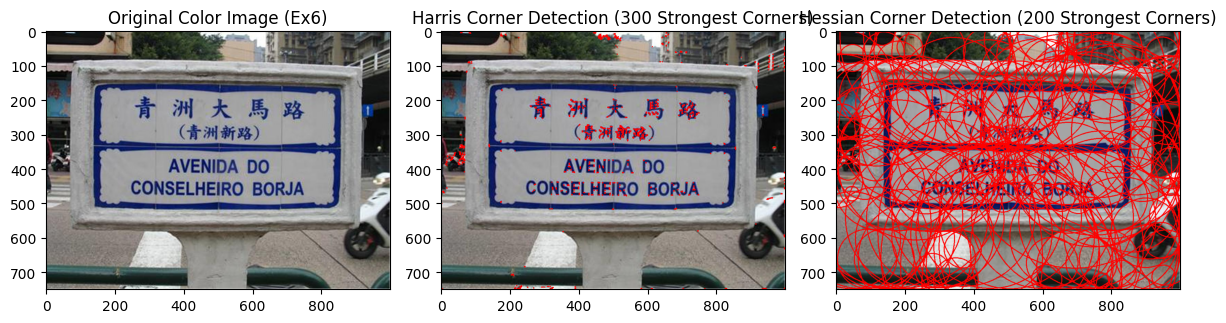

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Load the original color image from Git repository (Ex6.jpg)
url_ex6 = 'https://raw.githubusercontent.com/ngoan22mse23088/ImageVideoProcessing/master/Images/Ex6.jpg'
resp_ex6 = urllib.request.urlopen(url_ex6)
arr_ex6 = np.asarray(bytearray(resp_ex6.read()), dtype=np.uint8)
original_img_ex6 = cv2.imdecode(arr_ex6, cv2.IMREAD_COLOR)

# Convert the color image to grayscale
gray_img_ex6 = cv2.cvtColor(original_img_ex6, cv2.COLOR_BGR2GRAY)

# Harris corner detection
dst_harris = cv2.cornerHarris(gray_img_ex6, blockSize=2, ksize=3, k=0.04)
dst_harris = cv2.dilate(dst_harris, None)
corner_thresh_harris = 0.01 * dst_harris.max()
corner_img_harris = original_img_ex6.copy()
corner_img_harris[dst_harris > corner_thresh_harris] = [0, 0, 255]  # Mark corners in red

# Hessian corner detection
hessian = cv2.HoughCircles(gray_img_ex6, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=200, param2=30, minRadius=0, maxRadius=0)
if hessian is not None:
    hessian = np.uint16(np.around(hessian))
    corner_img_hessian = original_img_ex6.copy()
    for circle in hessian[0, :200]:
        center = (circle[0], circle[1])
        cv2.circle(corner_img_hessian, center, circle[2], (0, 0, 255), 2)  # Mark circles in red

# Display the images
plt.figure(figsize=(12, 6))

# Original color image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_img_ex6, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image (Ex6)')

# Harris corner detection
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(corner_img_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection (300 Strongest Corners)')

# Hessian corner detection
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(corner_img_hessian, cv2.COLOR_BGR2RGB))
plt.title('Hessian Corner Detection (200 Strongest Corners)')

plt.tight_layout()
plt.show()